### Signal Analysis through FFT (Fast Fourier Transform)
[Fast Fourier Transform Tutorial by Dr. Youssef](https://youssef-lab.sdsu.edu/wp-content/uploads/2016/09/FFT-Tutorial.pdf)

[Discrete Fourier Transform (numpy.fft)](https://numpy.org/doc/stable/reference/routines.fft.html#module-numpy.fft)

In [56]:
%matplotlib widget
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display

# Settings
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
xlim = [0,0.1]

def play_sound(signal, rate):
    wn = Audio(data=signal / np.max(np.abs(signal)), rate=rate)
    display(wn)

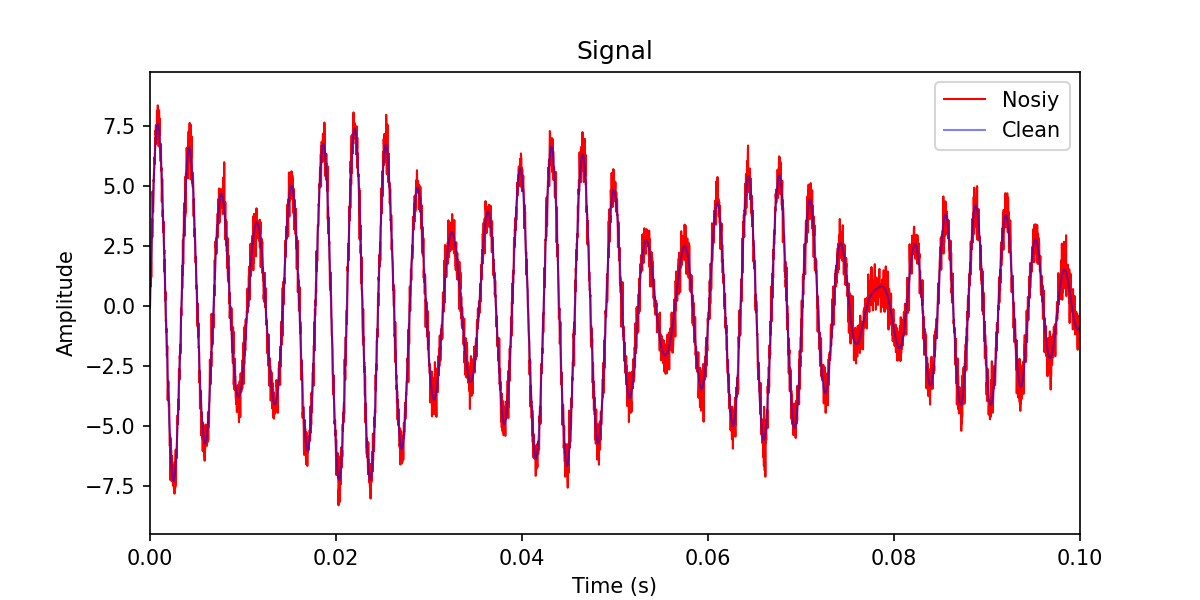

In [57]:
""" Generate signal """
sampling_frequency = 44100
t_period = 3
n_samples = sampling_frequency * t_period
t = np.linspace(0, t_period, n_samples, endpoint=False)

# Clean signal
fft_freq = np.random.uniform(low=220, high=880, size=3)
amplitude = np.random.uniform(low=0.5, high=5, size=3)
signal_clean = np.sum([a * np.sin(2 * np.pi * f * t) for a, f in zip(amplitude, fft_freq)], axis=0)

# Add random noise
noise = 0.5 * np.random.randn(n_samples)
signal_noisy = signal_clean + noise
play_sound(signal_clean, sampling_frequency)
play_sound(signal_noisy, sampling_frequency)

# Time domain plot
fig = plt.figure(figsize=(8, 4))
fig.set_label("Simple FFT")
ax = fig.subplots()
ax.plot(t, signal_noisy, linewidth=1, label='Nosiy', color='r')
ax.plot(t, signal_clean, linewidth=1, label='Clean', color='b', alpha=0.5)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.set_xlim(xlim)
ax.set_title("Signal")
ax.legend()
plt.show()

### Fast Fourier Transform (FFT)
$X = [x_0, x_1, \dots, x_{n-1}]$

$X_k = \sum_{m=0}^{n-1} x_m e^{-i2\pi km/n}$

Luckily, Numpy has it covered.
```python
np.fft.fft(time_data) -> frequency_data
```

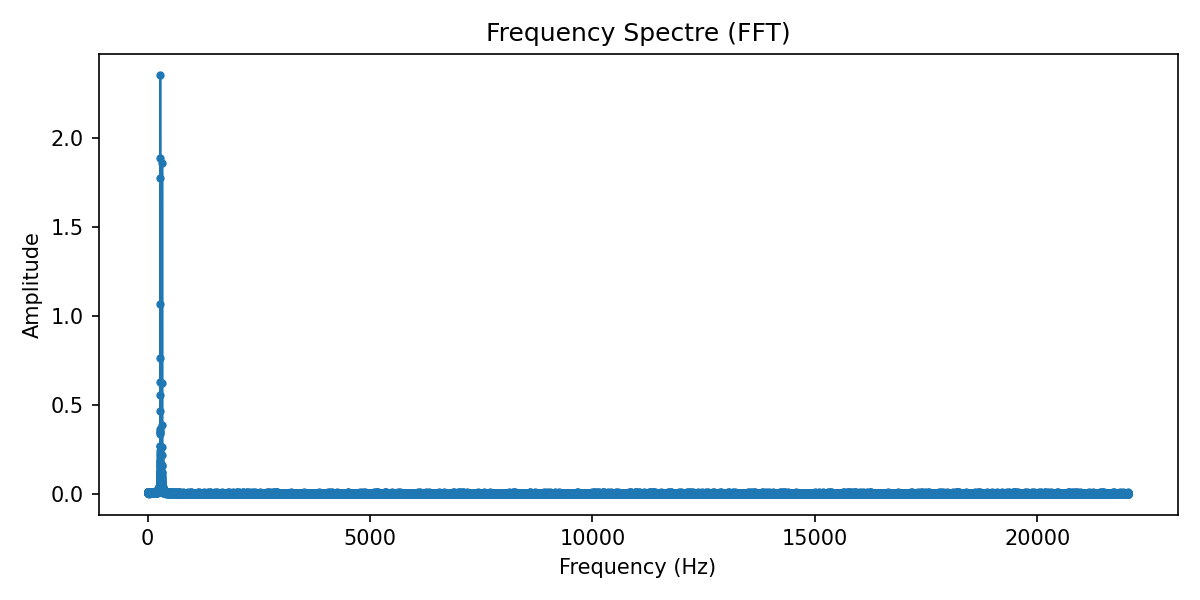

In [58]:
""" Frequency analysis using FFT [np.fft.fft(_)] """
fft_result = np.fft.fft(signal_noisy)
fft_freq = np.fft.fftfreq(n_samples, 1/sampling_frequency)
fft_ampl = np.array([2*np.linalg.norm(res)/n_samples for res in fft_result])

indices = np.where(fft_freq >= 0)
fft_freq = fft_freq[indices]
fft_ampl = fft_ampl[indices]
fft_result = fft_result[indices]

# Frequency domain plot
fig = plt.figure(figsize=(8, 4))
fig.set_label("Simple FFT")
ax = fig.subplots()
ax.plot(fft_freq, fft_ampl, 'o-', linewidth=1, markersize=3)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Amplitude")
ax.set_title("Frequency Spectre (FFT)")

fig.tight_layout()
plt.show()

### Fitering and Inverse FFT
```python
np.fft.ifft(frequency_data) -> time_data
```

#### Reminder: Mean Square Error (MSE)
$\frac{1}{2}\sum_{i=1}^n(X_i - \hat{X}_i)^2$, $X =$ observed values, $\hat{X} = $ predicted values

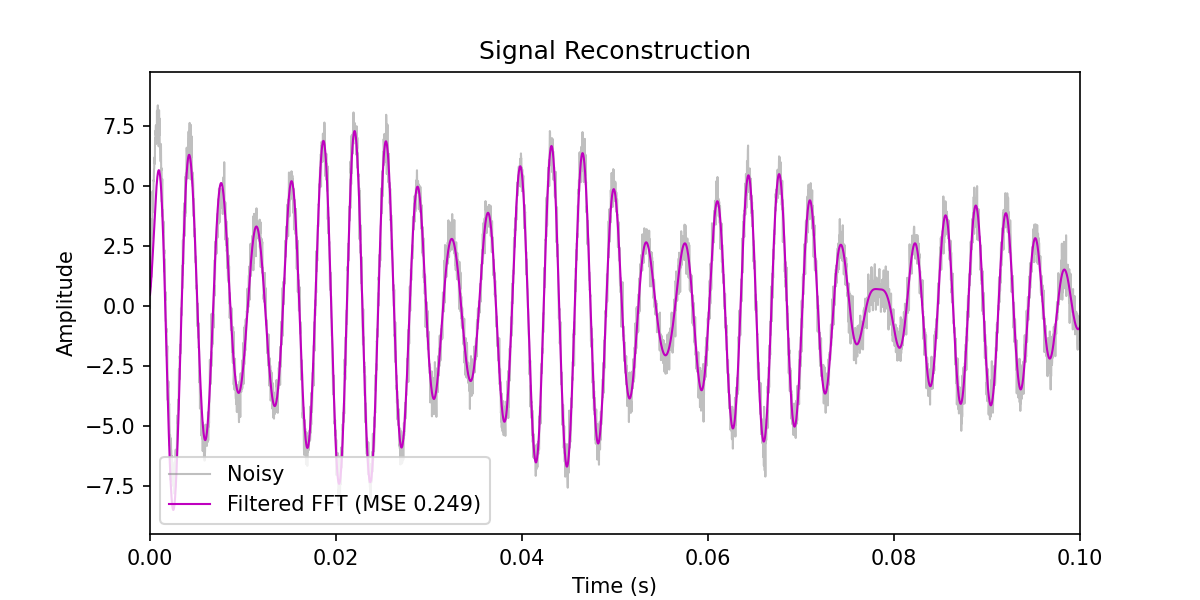

In [66]:
""" Signal reconstruction """
fft_filtered = fft_result.copy()

# Amplutude thresholding
# threshold = 0.125
# for i, amp in enumerate(fft_ampl):
#     fft_filtered[i] *= 1 if amp >= threshold else 0

# Low-pass filter
cutoff_freq_lo = 500
for i, freq in enumerate(fft_freq):
    fft_filtered[i] *= 1 if freq <= cutoff_freq_lo else 0

# High-pass filter
cutoff_freq_hi = 100
for i, freq in enumerate(fft_freq):
    fft_filtered[i] *= 1 if freq >= cutoff_freq_hi else 0

signal_reconstructed = np.fft.ifft(2 * fft_filtered, n_samples).real

play_sound(signal_clean, sampling_frequency)
play_sound(signal_noisy, sampling_frequency)
play_sound(signal_reconstructed, sampling_frequency)

# Compare noisy and reconstructed signals
signal_error = np.mean(np.pow(signal_noisy - signal_reconstructed, 2))  # Mean Squared Error

# Plot different signals
fig = plt.figure(figsize=(8, 4))
ax = fig.subplots()
ax.plot(t, signal_noisy, label='Noisy', color='gray', alpha=0.5, linewidth=1)
ax.plot(t, signal_reconstructed, label='Filtered FFT (MSE %5.3f)' % signal_error, color='m', linewidth=1)
ax.set_xlim(xlim)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.set_title("Signal Reconstruction")
ax.legend(loc='lower left')
plt.show()